## front-back normalization code

In [1]:
TFile *ipf = new TFile("data_16C.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");
TF1 *fup[3], *flow[3];
TString f1name;
for(int i=0;i<3;i++) {
    f1name.Form("fup%d",i);
    fup[i]=new TF1(f1name,"[0]+[1]*x",0,8000);
    f1name.Form("flow%d",i);
    flow[i]=new TF1(f1name,"[0]+[1]*x",0,8000);    
}

## 确定每个探测器正背面关联的大致范围

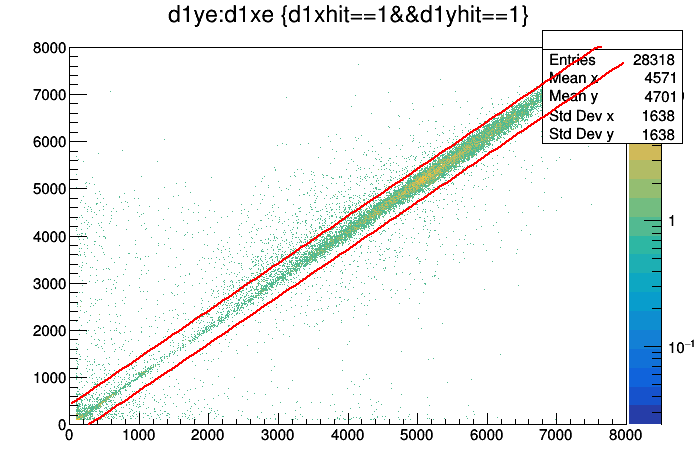

In [2]:
tree->Draw("d1ye:d1xe>>(1000,0,8000,1000,0,8000)","d1xhit==1&&d1yhit==1","colz");
fup[0]->SetParameters(405,1);
flow[0]->SetParameters(-300,1);
fup[0]->Draw("same");
flow[0]->Draw("same");
c1->SetLogz();
c1->Draw();

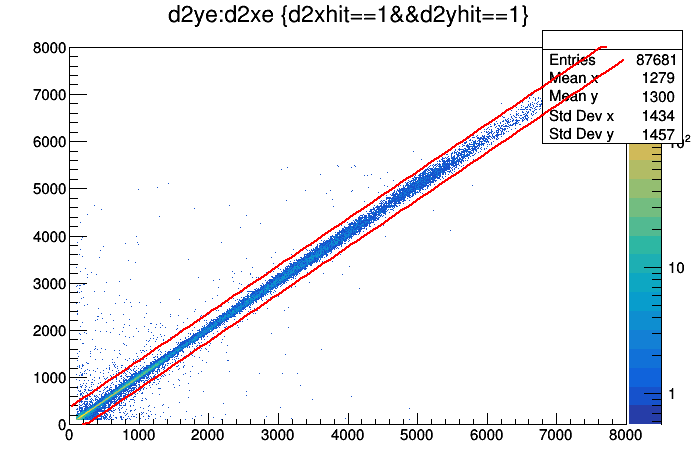

In [3]:
tree->Draw("d2ye:d2xe>>(1000,0,8000,1000,0,8000)","d2xhit==1&&d2yhit==1","colz");
fup[1]->SetParameters(350,1);
flow[1]->SetParameters(-250,1);
fup[1]->Draw("same");
flow[1]->Draw("same");
c1->Draw();

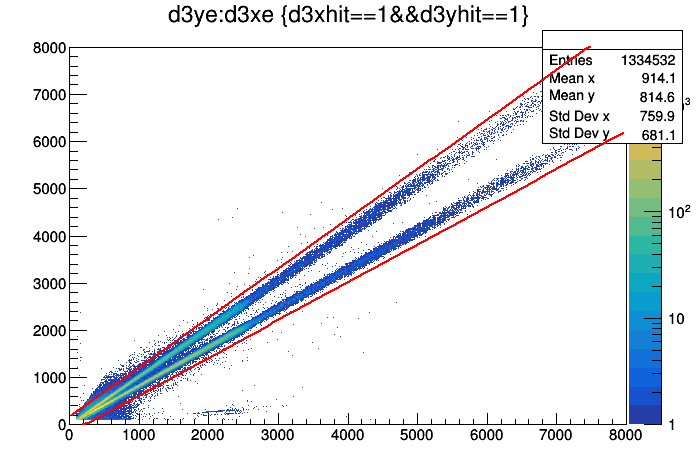

In [4]:
tree->Draw("d3ye:d3xe>>(1000,0,8000,1000,0,8000)","d3xhit==1&&d3yhit==1","colz");
fup[2]->SetParameters(150,1.05);
flow[2]->SetParameters(-200,0.8);
fup[2]->Draw("same");
flow[2]->Draw("same");
c1->Draw();
float kup[3], klow[3], cup[3], clow[3];
for(int i=0;i<3;i++) {
    kup[i]=fup[i]->GetParameter(1);
    cup[i]=fup[i]->GetParameter(0); 
    klow[i]=flow[i]->GetParameter(1);
    clow[i]=flow[i]->GetParameter(0);   
}

int xsmax[3],ysmax[3];//x/y strip number with maximum counts

## 找到每个探测器x和y面的具有最高统计的条的编号

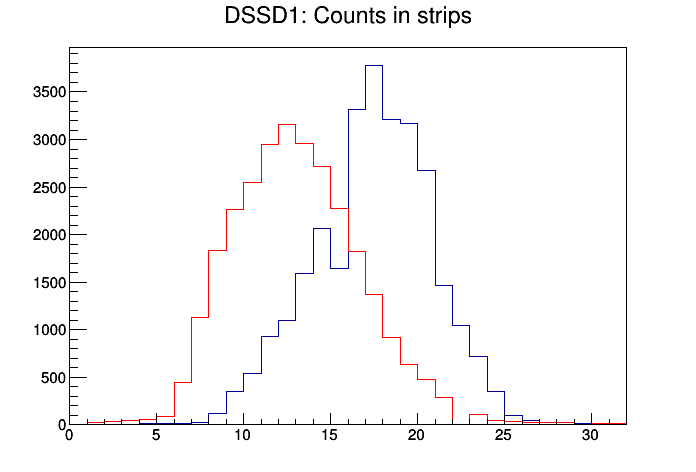

18 13


In [5]:
c1->SetLogz(0);
THStack *hs1 = new THStack("hs1","DSSD1: Counts in strips");
tree->Draw("d1xs>>h1xs(32,0,32)","d1xhit==1 && d1yhit==1");
tree->Draw("d1ys>>h1ys(32,0,32)","d1xhit==1 && d1yhit==1");
h1ys->SetLineColor(2);
hs1->Add(h1xs);
hs1->Add(h1ys);
xsmax[0]=h1xs->GetMaximumBin();
ysmax[0]=h1ys->GetMaximumBin();
cout<<xsmax[0]<<" "<<ysmax[0]<<endl;
hs1->Draw("nostack");
c1->Draw();

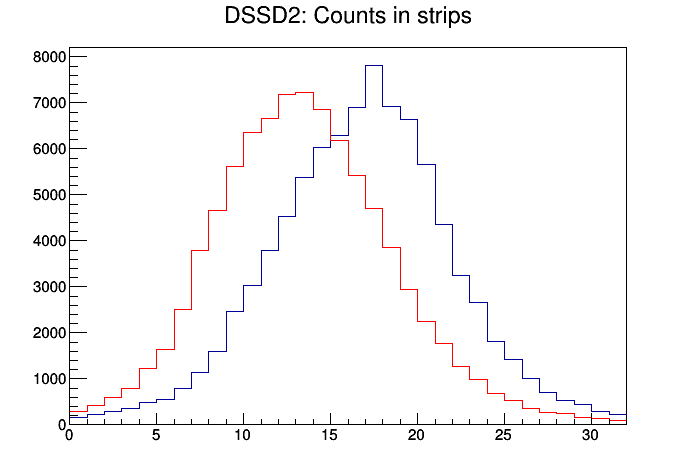

18 14


In [6]:
THStack *hs2 = new THStack("hs2","DSSD2: Counts in strips");
tree->Draw("d2xs>>h2xs(32,0,32)","d2xhit==1 && d2yhit==1");
tree->Draw("d2ys>>h2ys(32,0,32)","d2xhit==1 && d2yhit==1");
h2ys->SetLineColor(2);
hs2->Add(h2xs);
hs2->Add(h2ys);
xsmax[1]=h2xs->GetMaximumBin();
ysmax[1]=h2ys->GetMaximumBin();
cout<<xsmax[1]<<" "<<ysmax[1]<<endl;
hs2->Draw("nostack");
c1->Draw();

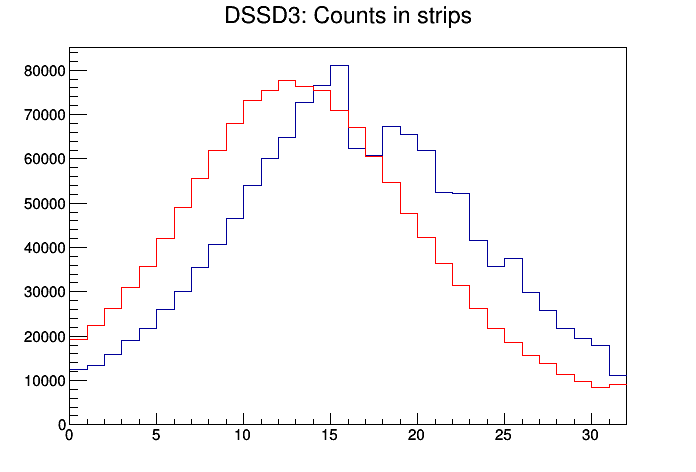

16 13


In [7]:
THStack *hs3 = new THStack("hs3","DSSD3: Counts in strips");
tree->Draw("d3xs>>h3xs(32,0,32)","d3xhit==1 && d3yhit==1");
tree->Draw("d3ys>>h3ys(32,0,32)","d3xhit==1 && d3yhit==1");
h3ys->SetLineColor(2);
hs3->Add(h3xs);
hs3->Add(h3ys);
xsmax[2]=h3xs->GetMaximumBin();
ysmax[2]=h3ys->GetMaximumBin();
cout<<xsmax[2]<<" "<<ysmax[2]<<endl;
hs3->Draw("nostack");
c1->Draw();

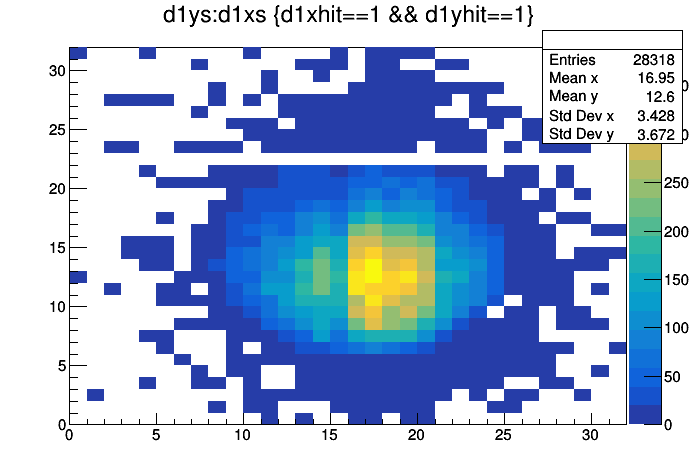

In [8]:
tree->Draw("d1ys:d1xs>>(32,0,32,32,0,32)","d1xhit==1 && d1yhit==1","colz");
c1->Draw();


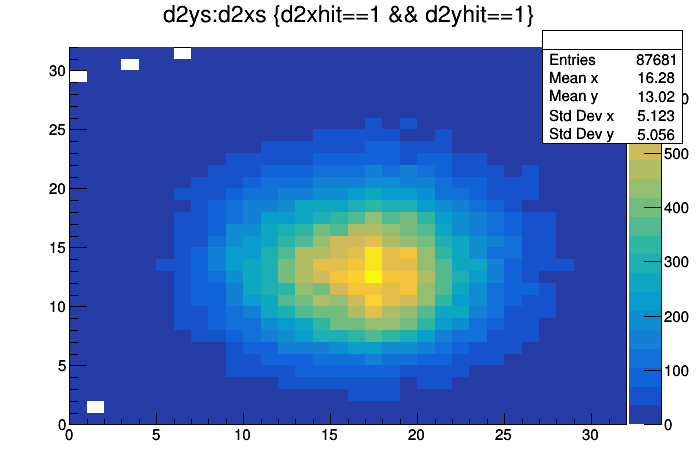

In [9]:
tree->Draw("d2ys:d2xs>>(32,0,32,32,0,32)","d2xhit==1 && d2yhit==1","colz");
c1->Draw();

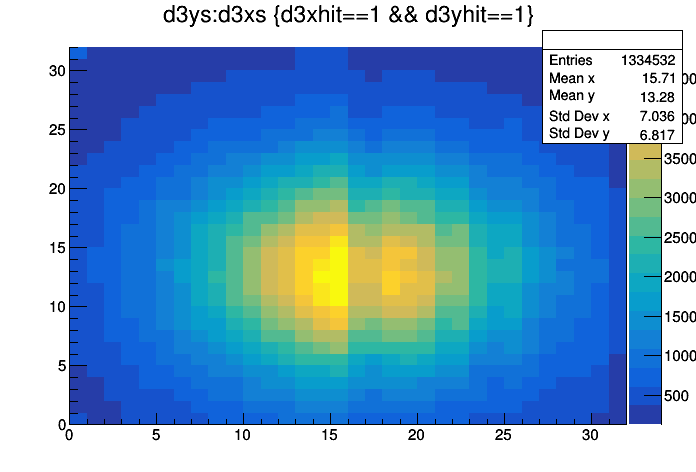

In [10]:
tree->Draw("d3ys:d3xs>>(32,0,32,32,0,32)","d3xhit==1 && d3yhit==1","colz");
c1->Draw();

## y条刻度步骤
![](dssdxy1.png)

In [11]:
int idet=1;//0,1,2
int ys=ysmax[idet];
int xs=xsmax[idet];

In [12]:
//选择x-y方向条的范围，以每条计数大于1500为界限
int dxs1[3]={10,8,5};
int dxs2[3]={24,25,25};
int dys1[3]={7,5,4};
int dys2[3]={20,22,25};
TString stree,hname;
TGraph *grx[32][32];

In [13]:
TString sdx,sdx1,sdy,sdy1;
TString scutx,scuty,scutxy;
TString stmp;
TString fgname;
TFile *fg;

### 将所有颗粒数据存入TGraph grx
### 第一次运行时对所有颗粒遍历生成gdet.root 数据，第二次运行时直接读入root文件中的TGraph

In [14]:
fgname.Form("grdet%d.root",idet+1);
if(!gSystem->AccessPathName(fgname.Data())) {
    cout<<"file "<<fgname<<" exists! reading graph data from "<<fgname<<endl;
    fg=new TFile(fgname.Data());
    for(int ix=0;ix<32;ix++) {
        for(int iy=0;iy<32;iy++) {
            hname.Form("gr%02d_%2d",ix,iy);
            grx[ix][iy]=(TGraph*) gROOT->FindObject(hname);   
            cout<<".";
        }
        cout<<endl;
        TString sout;
        sout.Form("idet=%d, ix= %2d", idet, ix);
        cout<<sout<<endl;
    }
}
else {
    cout<<"creating TGraph ..."<<endl;
    fg=new TFile(fgname.Data(),"RECREATE");//new file
    for(int ix=0;ix<32;ix++) {
        sdx.Form("d%dx[%d]",idet,ix);//d1x[ix] 
        scutx.Form("%s>200",sdx.Data());
        for(int i=ix-1;i<=ix+1;i+=2) {
            if(i>-1 && i<32)  {
                sdx1.Form("d%dx[%d]",idet,i);//d1x[i]
                stmp.Form("%s<100",sdx1.Data()); 
                scutx += " && " + stmp;
            }
        }
        for(int iy=0;iy<32;iy++) {
            sdy.Form("d%dy[%d]",idet,iy);//d1y[ys]   
            scuty.Form("%s>200",sdy.Data());
            for(int i=iy-1;i<=iy+1;i+=2) {
                if(i>-1 && i<32)  {
                    sdy1.Form("d%dy[%d]",idet,i);//d1y[i]
                    stmp.Form("%s<100",sdy1.Data()); 
                    scuty += " && " + stmp;
                }
            }
        
            TString scutxyup, scutxylow;
            double par[2];
            fup[idet-1]->GetParameters(&par[0]);
            scutxyup.Form("%s<%f*%s+%f",sdy.Data(),par[1],sdx.Data(),par[0]);
            flow[idet-1]->GetParameters(&par[0]);
           scutxylow.Form("%s>%f*%s+%f",sdy.Data(),par[1],sdx.Data(),par[0]);

            scutxy= scutx + "&&" + scuty + "&&" + scutxyup + "&&" + scutxylow;
            stree.Form("%s:%s",sdy.Data(),sdx.Data());
            tree->Draw(stree.Data(),scutxy.Data());
            grx[ix][iy] = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
            hname.Form("gr%02d_%2d",ix,iy);            
            grx[ix][iy]->SetName(hname.Data());
            grx[ix][iy]->Write();
            cout<<".";
        }
        cout<<endl;
        TString sout;
        sout.Form("idet=%d, ix= %2d", idet, ix);
        cout<<sout<<endl;
    }

}


file grdet2.root exists! reading graph data from grdet2.root
................................
idet=1, ix=  0
................................
idet=1, ix=  1
................................
idet=1, ix=  2
................................
idet=1, ix=  3
................................
idet=1, ix=  4
................................
idet=1, ix=  5
................................
idet=1, ix=  6
................................
idet=1, ix=  7
................................
idet=1, ix=  8
................................
idet=1, ix=  9
................................
idet=1, ix= 10
................................
idet=1, ix= 11
................................
idet=1, ix= 12
................................
idet=1, ix= 13
................................
idet=1, ix= 14
................................
idet=1, ix= 15
................................
idet=1, ix= 16
................................
idet=1, ix= 17
................................
idet=1, ix= 18
...........................

## 1.以y:ys条为标准刻度x:dxs1-dxs2条

In [15]:
TGraph *grxc[32];
TF1 *fpa1= new TF1("fp1","pol1",200,8000);
TF1 *fpa2= new TF1("fp2","pol2",200,8000);
TH2F *hres[32];
TString shead,sout,hresname;
double par[2],par2[32][3], chi2ndf[32];
int xmax[32],Ncx[32];

In [16]:
shead.Form("%4s%9s%11s%20s%16s%8s%8s","ix","p0","p1","p2","chi2/ndf","xmax","Nc");
cout<<shead<<endl;
for(int ix=dxs1[idet]; ix<=dxs2[idet]; ix++) {
    if(ix<0 || ix>31) continue;
    grxc[ix]=new TGraph;
    int ng=0;
    //fit with pol1 first, make new TGraph for the next fitting..
    if(grx[ix][ys]->GetN()>20) {
        grx[ix][ys]->Fit(fpa1,"Q ROB");
        fpa1->GetParameters(&par[0]);
        for(int k=0; k<grx[ix][ys]->GetN(); k++) {
            double x=grx[ix][ys]->GetX()[k];
            double y=grx[ix][ys]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grxc[ix]->SetPoint(ng,x,y);
                ng++;
            }            
        }
    }
    //fit with pol2
    if(grxc[ix]->GetN()>20) {
        grxc[ix]->Fit(fpa2,"Q");
        fpa2->GetParameters(&par2[ix][0]);
        chi2ndf[ix]=fpa2->GetChisquare()/fpa2->GetNDF();
        hresname.Form("hres%02d",ix);
        hres[ix] = new TH2F(hresname,hresname,100,-50,50,1000,200,8000);
        xsmax[ix]=0;
        for(int j = 0;j < grx[ix][ys]->GetN(); j++){
            double x=grx[ix][ys]->GetX()[j];
            double y=grx[ix][ys]->GetY()[j];
            if(x>xmax[ix]) xmax[ix]=x;
            x = y-(par2[ix][0]+par2[ix][1]*x+par2[ix][2]*x*x);
            hres[ix]->Fill(x,y);
            
        }
        Ncx[ix]=grxc[ix]->GetN();
        sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,ix  ,par2[ix][0]  ,par2[ix][1]  ,par2[ix][2]  ,chi2ndf[ix], xmax[ix],Ncx[ix]);
        cout<<sout<<endl;
    }
}


  ix       p0         p1                  p2        chi2/ndf    xmax      Nc
   8     0.55   0.985809        7.794400e-07           18.67    5542    2165
   9     4.10   0.983837        4.507553e-07           19.69    5634    2783
  10     8.16   1.020305        4.323551e-08           18.06    5909    3337
  11     4.39   1.003482        5.527226e-08           18.55    7009    4160
  12     0.60   1.025164        8.044330e-07           20.17    5910    4798
  13     5.56   1.020880        9.420959e-07           18.28    6426    5258
  14    -0.58   1.002442        1.001026e-06           18.81    6676    5769
  15     8.23   1.005371       -1.684961e-07           19.40    6502    6220
  16     3.47   1.019816        5.880978e-07           18.12    5635    6476
  17     4.55   1.014429        8.319090e-07           18.96    7121    6502
  18     8.10   0.999661       -3.595448e-07           17.59   24064    6496
  19     4.80   1.006404        7.550189e-07           20.03    6679    6177

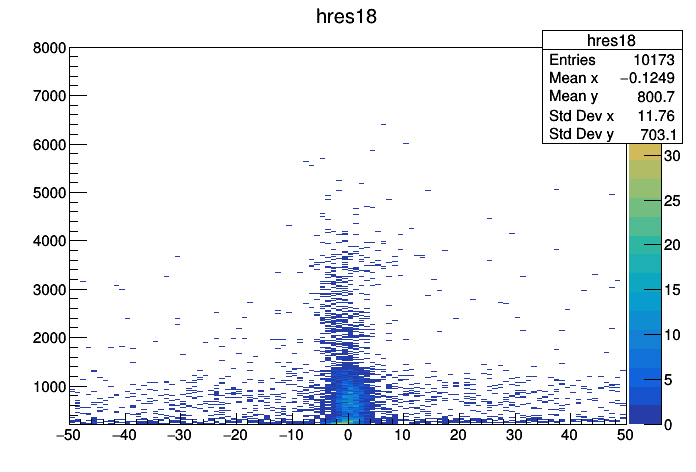

In [17]:
hres[xs]->Draw("colz");
c1->Draw();

In [18]:
TGraph *grsumx=new TGraph;
TH2F *hsumresx = new TH2F("hsumrex","hsumresx",100,-50,50,1000,200,8000);
int ngs=0;

### 合并dxs1到dxs2条的数据，用残差关联图检验刻度效果 

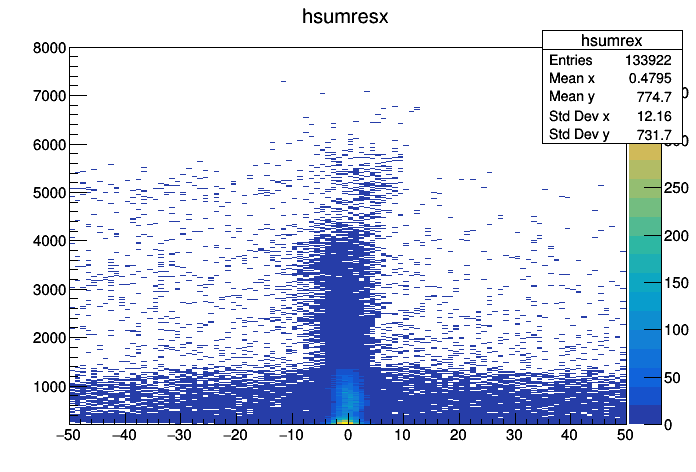

In [19]:

hsumresx->Reset();
for(int ix=dxs1[idet];ix<=dxs2[idet];ix++) {
     if(ix<0 || ix>31) continue;
    for(int i=0;i<grx[ix][ys]->GetN();i++) {
        double x=grx[ix][ys]->GetX()[i];
        double y=grx[ix][ys]->GetY()[i];
        x = par2[ix][0]+par2[ix][1]*x+par2[ix][2]*x*x;
        grsumx->SetPoint(ngs,x,y);
        hsumresx->Fill(x-y,y);
        ngs++;
    }
}
hsumresx->Draw("colz");
c1->Draw();//seems OK!

## 2.以刻度后的x:dxs1-dxs2条为标准刻度y:0-31


In [20]:
TGraph *grsy[32];//x<->y
TGraph *grsyc[32];
double par2y[32][3];
TH2F *hy[32], *hresy[32];
TF1 *fpy1[32],*fpy2[32]; 
//TH2F *hsumresx = new TH2F("hsumrex","hsumresx",100,-50,50,1000,200,8000);
//int ngs=0;

In [21]:
for(int iy=0;iy<32;iy++) {
    int ngy=0;
    grsy[iy]=new TGraph;
    for(int ix=dxs1[idet];ix<=dxs2[idet];ix++) {
        if(ix<0 || ix>31) continue;
        for(int i=0;i<grx[ix][iy]->GetN();i++) {
            double x=grx[ix][iy]->GetX()[i];
            double y=grx[ix][iy]->GetY()[i];
            x = par2[ix][0]+par2[ix][1]*x+par2[ix][2]*x*x;
            grsy[iy]->SetPoint(ngy,y,x);//swap x,y for TGraph fit, x=ky+b;
            ngy++;
        }
    }
    TString sname;
    sname.Form("p%2dy1",iy);
    fpy1[iy]=new TF1(sname.Data(),"pol1",200,8000);
    fpy1[iy]->SetLineColor(kGray);
    int ng=0;
    grsyc[iy]=new TGraph;
    //fit with pol1 first, make new TGraph for the next fitting..
    if(grsy[iy]->GetN()>20) {
        grsy[iy]->Fit(fpy1[iy],"Q ROB");
        fpy1[iy]->GetParameters(&par[0]);
        for(int k=0; k<grsy[iy]->GetN(); k++) {
            double x=grsy[iy]->GetX()[k];
            double y=grsy[iy]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<10) {
                grsyc[iy]->SetPoint(ng,x,y);
                ng++;
            }            
        }
    }
    sname.Form("h%2dy",iy);
    hy[iy]=new TH2F(sname.Data(),sname.Data(),1000,0,8000,1000,0,8000);
    for(int i = 0;i < grsyc[iy]->GetN();++i)  
        hy[iy]->Fill(grsy[iy]->GetX()[i],grsy[iy]->GetY()[i]);
    //fit with pol2
    sname.Form("p%2dy2",iy);
    fpy2[iy]=new TF1(sname.Data(),"pol2",200,8000);
    fpy2[iy]->SetLineColor(kGray);
    if(grsyc[iy]->GetN()>20) {
        grsyc[iy]->Fit(fpy2[iy],"Q");
        fpy2[iy]->GetParameters(&par2y[iy][0]);
        chi2ndf[iy]=fpy2[iy]->GetChisquare()/fpy2[iy]->GetNDF();
        hresname.Form("hresy%02d",iy);
        hresy[iy] = new TH2F(hresname,hresname,100,-50,50,1000,200,8000);
        xsmax[iy]=0;
        for(int j = 0;j < grsyc[iy]->GetN(); j++)
            if( grsyc[iy]->GetX()[j]>xmax[iy] ) xmax[iy]=grsyc[iy]->GetX()[j];
        for(int j = 0;j < grsy[iy]->GetN(); j++){
            double x=grsy[iy]->GetX()[j];
            double y=grsy[iy]->GetY()[j];
            x = y-(par2y[iy][0]+par2y[iy][1]*x+par2y[iy][2]*x*x);
           hresy[iy]->Fill(x,y);      
        }
        Ncx[iy]=grsyc[iy]->GetN();
        sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,iy  ,par2y[iy][0]  ,par2y[iy][1]  ,par2y[iy][2]  ,chi2ndf[iy], xmax[iy],Ncx[iy]);
        cout<<sout<<endl;
    }
}

   0     0.75   0.972037        4.476502e-07            7.19    4716    5580
   1     7.80   0.990907       -6.329736e-07            6.95    4669    7948
   2    -0.30   0.992296       -3.560780e-09            5.99    5455   10877
   3     6.36   0.985543       -1.056523e-07            6.06    5417   14145
   4    -4.91   0.984488        1.513089e-06            5.91    4398   19596
   5     4.31   0.994834        2.974511e-07            5.49    6024   27475
   6    -3.55   0.988913        8.507688e-07            5.71    5919   37177
   7     8.86   1.005882       -2.313186e-07            6.16    6946   46895
   8     2.25   1.005575        1.015261e-07            5.84    7467   57359
   9     0.75   1.017507        6.089042e-07            6.01    6836   65789
  10     0.40   0.973784        4.983058e-07            6.10    6717   73419
  11     4.58   1.000464       -4.753756e-08            6.24    7439   78704
  12    -2.13   0.992100        4.906734e-07            6.14    7669   81330

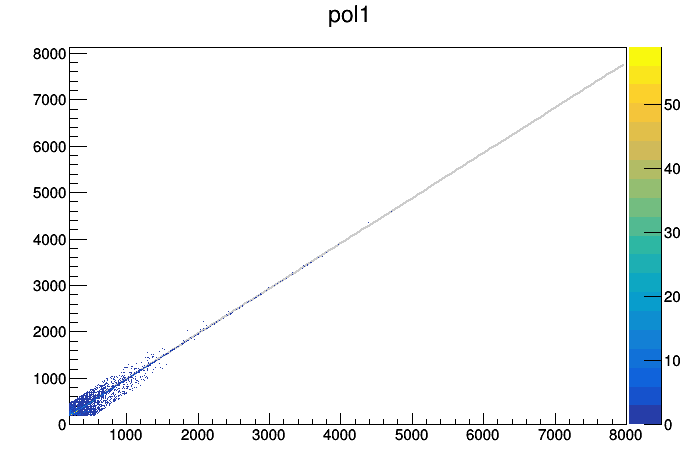

In [22]:
fpy1[0]->Draw();
hy[0]->Draw("colz same");
c1->Draw();

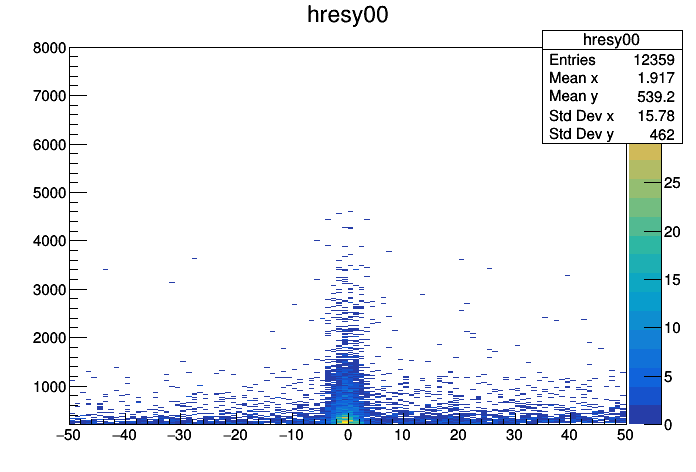

In [23]:
hresy[0]->Draw("colz");
c1->Draw();

## x条刻度步骤
![](dssdxy2.png)

## 3.以刻度后的x:xs条为标准刻度y:dys1-dys2条
下面略过这一步，将第二步的刻度系数运用于第4步

## 4.以刻度后的y:dys1-dys2条为标准刻度x:0-31


In [24]:
int ymax[32],Ncy[32];
TGraph *grsx[32];//x<->y
TGraph *grsxc[32];
double par2x[32][3];
TH2F *hx[32], *hresx[32];
TF1 *fpx1[32],*fpx2[32]; 

In [25]:
for(int ix=0;ix<32;ix++) {
    int ngy=0;
    grsx[ix]=new TGraph;
    for(int iy=dys1[idet];iy<=dys2[idet];iy++) {
        if(iy<0 || iy>31) continue;
        for(int i=0;i<grx[ix][iy]->GetN();i++) {
            double x=grx[ix][iy]->GetX()[i];
            double y=grx[ix][iy]->GetY()[i];
            y = par2y[iy][0]+par2y[iy][1]*y+par2y[iy][2]*y*y;
            grsx[ix]->SetPoint(ngy,x,y);//
            ngy++;
        }
    }
    TString sname;
    sname.Form("p%2dx1",ix);
    fpx1[ix]=new TF1(sname.Data(),"pol1",200,8000);
    fpx1[ix]->SetLineColor(kGray);
    int ng=0;
    grsxc[ix]=new TGraph;
    //fit with pol1 first, make new TGraph for the next fitting..
    if(grsx[ix]->GetN()>20) {
        grsx[ix]->Fit(fpx1[ix],"Q ROB");
        fpx1[ix]->GetParameters(&par[0]);
        for(int k=0; k<grsx[ix]->GetN(); k++) {
            double x=grsx[ix]->GetX()[k];
            double y=grsx[ix]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<10) {
                grsxc[ix]->SetPoint(ng,x,y);
                ng++;
            }            
        }
    }
    sname.Form("h%2dx",ix);
    hx[ix]=new TH2F(sname.Data(),sname.Data(),1000,0,8000,1000,0,8000);
    for(int i = 0;i < grsxc[ix]->GetN();++i)  
        hx[ix]->Fill(grsx[ix]->GetX()[i],grsx[ix]->GetY()[i]);
    //fit with pol2
    sname.Form("p%2dx2",ix);
    fpx2[ix]=new TF1(sname.Data(),"pol2",200,8000);
    fpx2[ix]->SetLineColor(kGray);
    if(grsxc[ix]->GetN()>20) {
        grsxc[ix]->Fit(fpx2[ix],"Q");
        fpx2[ix]->GetParameters(&par2x[ix][0]);
        chi2ndf[ix]=fpx2[ix]->GetChisquare()/fpx2[ix]->GetNDF();
        hresname.Form("hresx%02d",ix);
        hresx[ix] = new TH2F(hresname,hresname,100,-50,50,1000,200,8000);
        ysmax[ix]=0;
        for(int j = 0;j < grsxc[ix]->GetN(); j++)
            if( grsxc[ix]->GetX()[j]>ymax[ix] ) ymax[ix]=grsxc[ix]->GetX()[j];
        for(int j = 0;j < grsx[ix]->GetN(); j++){
            double x=grsx[ix]->GetX()[j];
            double y=grsx[ix]->GetY()[j];
            x = y-(par2x[ix][0]+par2x[ix][1]*x+par2x[ix][2]*x*x);
           hresx[ix]->Fill(x,y);      
        }
        Ncy[ix]=grsxc[ix]->GetN();
        sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,ix  ,par2x[ix][0]  ,par2x[ix][1]  ,par2x[ix][2]  ,chi2ndf[ix], ymax[ix],Ncy[ix]);
        cout<<sout<<endl;
    }
}

   0    -6.37   0.999201        1.252408e-06            7.60    4134    2638
   1     9.31   1.019058       -7.516872e-07            6.23    4239    3877
   2     1.66   1.009772        2.217771e-07            6.22    4545    5146
   3     5.86   0.991793       -9.997203e-07            6.12    4239    6447
   4     6.15   1.013800       -1.328310e-06            6.07    4853    7927
   5     2.93   1.030936        3.556528e-07            5.53    5442   10596
   6    -1.84   1.031049        2.290080e-07            5.61    5701   14739
   7     1.20   0.994761        9.095049e-07            5.38    5404   20085
   8    -0.05   0.986998        4.571001e-07            5.35    5730   25876
   9     3.45   0.985077        1.211425e-07            5.60    7107   33301
  10     7.90   1.020940       -1.815863e-07            6.01    6579   40318
  11     4.14   1.004132       -2.093108e-07            5.96    7482   49274
  12     0.67   1.025273        6.836388e-07            5.81    6131   56374

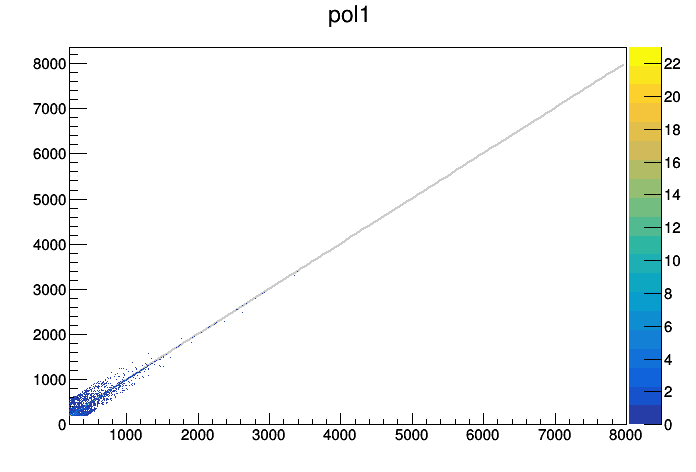

In [26]:
fpx1[0]->Draw();
hx[0]->Draw("colz same");
c1->Draw();

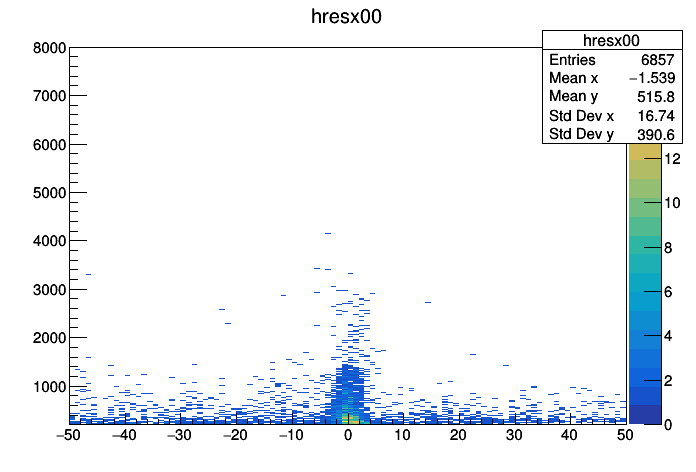

In [27]:
hresx[0]->Draw("colz");
c1->Draw();

In [28]:
TGraph *grall=new TGraph;
TH2F *hresall = new TH2F("hresall","hresall",100,-50,50,1000,200,8000);
int ngsa=0;


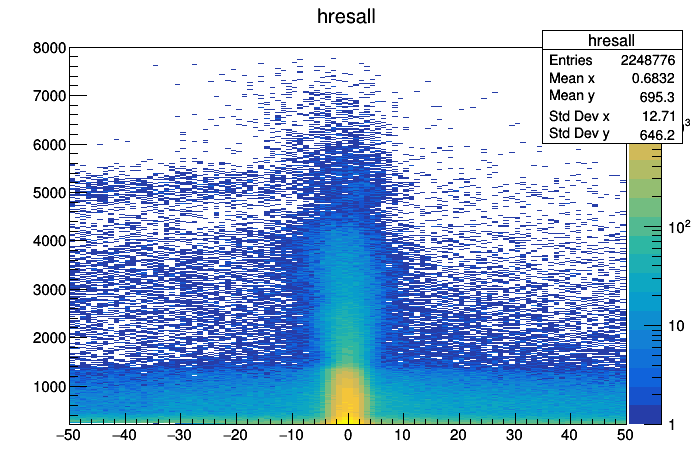

In [29]:
hresall->Reset();
for(int ix=0;ix<32; ix++) {
   for(int iy=0;iy<32;iy++) {
    for(int i=0;i<grx[ix][iy]->GetN();i++) {
        double x=grx[ix][iy]->GetX()[i];
        double y=grx[ix][iy]->GetY()[i];
        x = par2x[ix][0]+par2x[ix][1]*x+par2x[ix][2]*x*x;
        y = par2y[iy][0]+par2y[iy][1]*y+par2y[iy][2]*y*y;
        grall->SetPoint(ngsa,x,y);
        hresall->Fill(x-y,y);
        ngsa++;
    }
   }
}
hresall->Draw("colz");
c1->SetLogz();
c1->Draw();//seems OK!